# Explore and processing data - Red wine quality

> Dataset: winequality-red.csv

## Meaning of all features

- fixed acidity

    Độ axit cố định (g/L tartaric acid).

    Chủ yếu là axit không bay hơi (ví dụ tartaric acid). Ảnh hưởng đến vị chua và sự ổn định của rượu.

- volatile acidity

    Độ axit bay hơi (g/L acetic acid).

    Lượng axit bay hơi cao có thể gây mùi khó chịu (giống mùi giấm).

- citric acid

    Axit citric (g/L).

    Tạo vị tươi mát, chua nhẹ cho rượu. Hàm lượng cao thường là dấu hiệu tích cực.

- residual sugar

    Lượng đường dư (g/L).

    Đường còn sót lại sau quá trình lên men. Nồng độ thấp thường dưới 1 g/L, cao hơn sẽ tạo vị ngọt.

- chlorides

    Hàm lượng muối (g/L).

    Nồng độ cao có thể gây vị mặn, không tốt cho chất lượng rượu.

- free sulfur dioxide

    Lượng SO₂ tự do (mg/L).

    Có tác dụng kháng khuẩn, chống oxy hóa. Tuy nhiên, nồng độ quá cao sẽ ảnh hưởng đến hương vị.

- total sulfur dioxide

    Tổng SO₂ (mg/L).

    Bao gồm SO₂ tự do và liên kết. Nếu vượt ngưỡng sẽ gây mùi khó chịu.

- density

    Tỷ trọng của rượu (g/cm³).

    Liên quan đến lượng cồn và đường. Rượu có cồn cao thường nhẹ hơn.

- pH

    Độ pH (thang 0–14).

    Thông thường rượu vang có pH từ 2.9 đến 4.

    pH thấp &rarr; chua, pH cao &rarr; nhạt nhẽo, dễ hỏng.

- sulphates

    Hàm lượng sulphates (g/L potassium sulphate).

    Góp phần tăng SO₂ và tạo hương vị. Nồng độ hợp lý cải thiện bảo quản và hương vị.

- alcohol

    Nồng độ cồn (%).

    Yếu tố quan trọng nhất tạo cảm giác “nặng” của rượu.

- quality

    Điểm đánh giá chất lượng rượu (thang từ 0 đến 10, do chuyên gia chấm).

    Đây là biến mục tiêu (target variable) trong các bài toán dự đoán chất lượng rượu.

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

## 1. Load the data

In [216]:
# Get path of data
path_current_dir = Path.cwd()
path_dataset = path_current_dir.resolve().parent.joinpath("./dataset/winequality-red.csv")
print(path_dataset)

/home/nii/Documents/SGU_2025_ML-Fundamentals/dataset/winequality-red.csv


In [217]:
# Load the dataset
wine_data = pd.read_csv(path_dataset)

# Get all sample have 'quality' equal 8
wine_data[wine_data['quality'] == 8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [218]:
wine_data[wine_data['quality'] == 3]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


## 2. Remove duplication 

### 2.1 Check for duplicated sample


In [219]:
# Get all duplicate data (include the 'first')
wine_data_dup_all = wine_data[wine_data.duplicated(keep=False)]
# Get all duplicate data (except the 'first')
wine_data_dup = wine_data[wine_data.duplicated(keep='first')]
wine_data_dup

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


&rarr; We have 240 duplicated rows

### 2.2 Remove duplicated samples

In [220]:
# Drop duplicated data (keep the first), reset the index to 0, 1, 2,... and drop the old index. Then copy to a new dataframe
wine_data_unique = wine_data.drop_duplicates(keep='first').reset_index(drop=True).copy()

print("Shape of our data before remove duplicated rows: ", wine_data.shape)
print("Shape of our data after remove duplicated rows: ", wine_data_unique.shape)

wine_data_unique

Shape of our data before remove duplicated rows:  (1599, 12)
Shape of our data after remove duplicated rows:  (1359, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2.3 Drop specific rows, columns:

In [221]:
wine_data_dup.shape

(240, 12)

In [232]:
# Reset index:
# wine_data_dup.reset_index(drop=True,  inplace=True)
wine_data_dup = wine_data_dup.reset_index(drop=True)

# Drop a specific row:
wine_data_drop_row = wine_data_dup.drop(labels=[0, 1, 11, 111, 113], axis=0)
print("Shape of duplicated wine data after remove rows: ", wine_data_drop_row.shape)

# Drop a specific columns with columns name:
wine_data_drop_col = wine_data_dup.drop(labels=['free sulfur dioxide', 'total sulfur dioxide'], axis=1)
print("Shape of duplicated wine data after remove columns: ", wine_data_drop_col.shape)


Shape of duplicated wine data after remove rows:  (236, 13)
Shape of duplicated wine data after remove columns:  (241, 11)


## 3. Change values and dtype of data

In [233]:
wine_data_dup

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,0
0,7.4,0.700,NaN,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,NaN
1,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5.0,NaN
2,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5.0,NaN
3,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5.0,NaN
4,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0,NaN
237,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0,NaN
238,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5.0,NaN
239,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,NaN


### 3.1 Change, replace values

#### a.Columns: 

- Replace with `assign()` &rarr; return new DF

In [224]:
# Plus 1 to all quality columns, change all values of pH column to 0
wine_data_dup_new = wine_data_dup.assign(quality = wine_data_dup['quality'] + 1, pH = 0)

wine_data_dup_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,0,0.56,9.4,6
1,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,0,0.80,10.5,6
2,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,0,0.91,9.5,6
3,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,0,0.83,10.5,6
4,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,0,0.39,10.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
235,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,0,0.54,10.1,6
236,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,0,0.54,10.1,6
237,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,0,0.54,10.1,6
238,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,0,0.60,11.3,6


#### b. With condition 

-  `df.loc[condition, 'column'] = value`: assign value to column when condition is True 
&rarr; return new DF

In [ ]:
test = wine_data_dup.mask(wine_data_dup['quality'] >= 7, 11)

# wine_data_dup_cond

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,0
0,7.4,0.700,NaN,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,NaN
1,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5.0,NaN
2,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5.0,NaN
3,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5.0,NaN
4,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0,NaN
237,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0,NaN
238,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5.0,NaN
239,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,NaN


In [229]:
# Replace value 0.00 of 'citric acid' to NaN
wine_data_dup['citric acid'] = wine_data_dup['citric acid'].replace([0.0], [np.nan]).copy()

wine_data_dup.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,0
0,7.4,0.700,NaN,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,NaN
1,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0,NaN
2,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5.0,NaN
3,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5.0,NaN
4,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5.0,NaN


In [227]:
# Change specific values
wine_data_dup.at['citric acid', 0] = 14

wine_data_dup.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,0
0,7.4,0.700,NaN,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,NaN
1,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0,NaN
2,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5.0,NaN
3,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5.0,NaN
4,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5.0,NaN


### 3.2 Change datatype of column

In [228]:
# Change dtype of 'free sulfur dioxide' from float to int
wine_data_dup['free sulfur dioxide'] = wine_data_dup['free sulfur dioxide'].astype(int).copy()

wine_data_dup.head()


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## 4. Handle missing values

### 4.1 Check and report missing values:

##### Missing report: count & percent

In [ ]:
def missing_report(df):
    missing_count = df.isna().sum()
    missing_percent = df.isna().mean() * 100
    # Concat 2 Series 
    missing_report = pd.concat([missing_count, missing_percent], axis=1)
    missing_report.columns = ["Count", "Percent"]
    # print("- Missing report: \n", missing_report)
    return missing_report


In [ ]:
missing_report(wine_data_dup)

,Count,Percent
fixed acidity,0,0.000000
volatile acidity,0,0.000000
citric acid,13,5.416667
residual sugar,0,0.000000
chlorides,0,0.000000
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,0,0.000000
sulphates,0,0.000000


##### Visualize with heatmap 

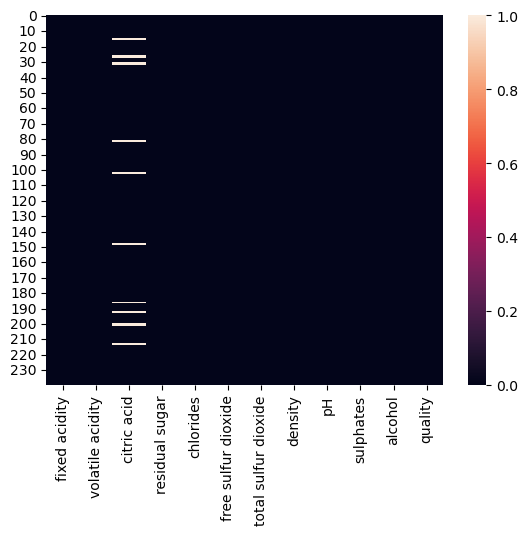

In [ ]:
sns.heatmap(wine_data_dup.isna());

### 4.2 Drop all rows(sample) have Nan values

In [ ]:
# Drop all samples which have NaN values
wine_data_dup_no_na = wine_data_dup.dropna(how='any')

# Missing report after dropna:
missing_report(wine_data_dup_no_na)

# print("Data before drop na: ",wine_data_dup.isna().sum())
# print("Data after drop na: ",wine_data_dup_no_na.isna().sum(), "\n")

# print("Shape before drop na: ",wine_data_dup.shape)
# print("Shape after drop na: ",wine_data_dup_no_na.shape)

,Count,Percent
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0
